In [1]:
import pandas as pd
import numpy as np
from scipy import stats # for statistics like t-tests
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns # for making plots with seaborn
from matplotlib.ticker import FuncFormatter

In [2]:
# Import data (for Mac the "\\" might be replaced by "/")
cwd = os.getcwd()
data = pd.read_csv(cwd + "\\WA_Fn-UseC_-Sales-Win-Loss.csv", index_col = 0)

In [3]:
data.head()

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
Opportunity Number,,,,,,,,,,,,,,,,,,
1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


Start by formatting variable names:

In [4]:
# Format variable names
names = list(data.columns)

for i in range(len(names)):
    names[i] = names[i].replace(" ", "")
    
# Rename selected variables
indeces = [
    4, 7, 8, 9,
    10, 11, 12, 
    14, 15, 16
    ]

names_update = [
    "DaysSales", "DaysClosing", "DaysQualified", "OpportunityAmount",
    "ClientRevenue", "ClientEmployees", "PastRevenue",
    "IdentifiedDaysRatio", "ValidatedDaysRatio", "QualifiedDaysRatio"
    ]

for ind, i in zip(indeces, range(len(indeces))):
    names[ind] = names_update[i]
    
data.columns = names

In [5]:
data.head()

,SuppliesSubgroup,SuppliesGroup,Region,RouteToMarket,DaysSales,OpportunityResult,SalesStageChangeCount,DaysClosing,DaysQualified,OpportunityAmount,ClientRevenue,ClientEmployees,PastRevenue,CompetitorType,IdentifiedDaysRatio,ValidatedDaysRatio,QualifiedDaysRatio,DealSizeCategory
Opportunity Number,,,,,,,,,,,,,,,,,,
1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


## Business understanding
### Creating a cost-benefit matrix

<table class="tableizer-table">
<tbody>
    <tr><td bgcolor = white>&nbsp;</td><td bgcolor = white> </td><td colspan="2" bgcolor = white><center><b>Actual Class</b></center></td></tr>
 <tr><td>&nbsp;</td><td>&nbsp;</td><td> <i>Win (+)</i></td><td><i>Loss (-)</i></td></tr>
    <tr><td bgcolor = white rowspan="2"><b>Predicted class</b></td><td bgcolor = white><i>Win (+)</i></td><td> Opportunity Amount - Cost </td><td> -Cost </td></tr>
 <tr><td><i>Loss (-)</i></td><td> Opportunity Amount </td><td> - </td></tr>
</tbody></table>

There are two possible ways how decisions can be made based on the model: <br>
    1) Only submit tenders for those sales opportunities that are likely to be won. <br>
    2) Submit an initial tender in every sales opportunity and follow up only in those sales opportunities that are likely to be won

The decision which strategy to pursue will mostly depend on the cost structure. If an intial tender can be prepared at realtively low cost, it may be feasible to do so for all sales opportunities.

For this study, we will assume 
- that the likelyhood of winning a sales opportunity is positively correlated with the sales staffs' effort (unobserved), meaning that focussing on designated opportunities and pursuing those with more effort will increase the probability of winning these  opportunities,
- that the cost of each opportunity in terms of necessary resources to evaluate the customer's needs, prepare a tender etc. is independent from the opportunity amount. (In practice, sales opportunities with a higher deal volume are likely to go along with higher costs, but due to limited information, we will leave this problem aside.)
- that the sales department of the company is facing limited ressources that don't allow to pursue all sales opportunities with such an effort that would result in the highest possible increase in the likelihood of winning an opportunity.

This makes it reasonable to pursue only a subset of all sales opportunities and putting more effort on those. Obviously, the final decision, which opportunities to pursue, will not only depend on the probability of winning but also on the opportunity amount. Therefore, we multiply the predicted probability of winning the case with the opportunity amount, so that the company can decide based on this ranking to follow up with the k% top sales opportunities, depending on the available budget.

## Data understanding
### Analyze the sales process
In this section we want to gain a deeper understanding of the sales process. Which stages does it have and what do the variables related to the days spent in each stay mean?

In [6]:
# Create a temporary object to analyze the Days Ratios
temp = data.loc[:, ["OpportunityResult", "DaysSales", "SalesStageChangeCount", "DaysClosing", 
                    "DaysQualified", "IdentifiedDaysRatio", "ValidatedDaysRatio", "QualifiedDaysRatio"]]

In [7]:
# Is the sales stage "Qualified" upstream of "Closing"?
temp[temp.DaysClosing < temp.DaysQualified].shape

(0, 8)

The number of days until closing is always bigger than the number of days until qualified. This means that the closing is the last stage.

Next, let's look at the distribution of the days ratios. Do they differ for won and lost cases?

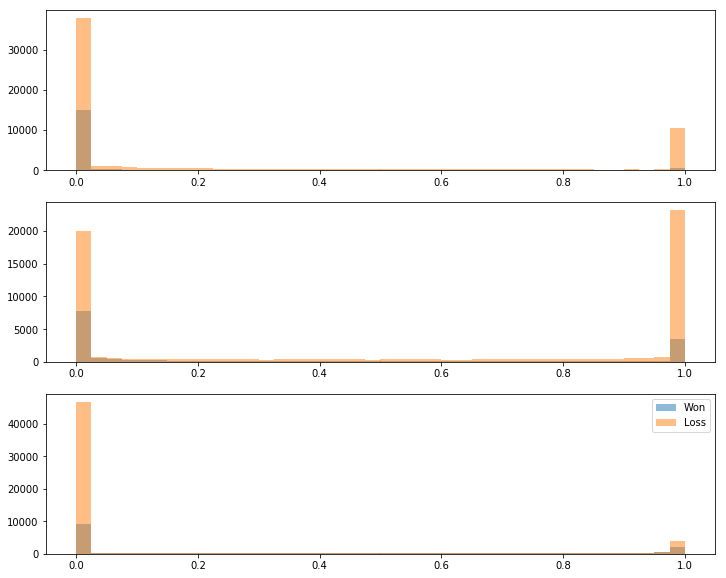

In [8]:
# Plot the distributions of the ratios

x1 = temp[temp.OpportunityResult == "Won"]["IdentifiedDaysRatio"]
y1 = temp[temp.OpportunityResult == "Loss"]["IdentifiedDaysRatio"]

x2 = temp[temp.OpportunityResult == "Won"]["ValidatedDaysRatio"]
y2 = temp[temp.OpportunityResult == "Loss"]["ValidatedDaysRatio"]

x3 = temp[temp.OpportunityResult == "Won"]["QualifiedDaysRatio"]
y3 = temp[temp.OpportunityResult == "Loss"]["QualifiedDaysRatio"]

# Make the plot
f, ax = plt.subplots(3, 1, figsize=(12, 10))

id_days_won = ax[0].hist(x1, bins = 40, alpha = 0.5, label = 'Won')
id_days_loss = ax[0].hist(y1, bins = 40, alpha = 0.5, label = 'Loss')
# axs[0].set_title("Identified Days Ratio")

val_days_won = ax[1].hist(x2, bins = 40, alpha = 0.5, label = 'Won')
val_days_loss = ax[1].hist(y2, bins = 40, alpha = 0.5, label = 'Loss')
# axs[1].set_title("Validated Days Ratio")

qual_days_won = ax[2].hist(x3, bins = 40, alpha = 0.5, label = 'Won')
qual_days_loss = ax[2].hist(y3, bins = 40, alpha = 0.5, label = 'Loss')
# axs[2].set_title("Qualified Days Ratio")

plt.legend(loc='upper right')
plt.show()

The distribution of ratios differ to some extend, but most striking is the fact that nearly all opportunities have the value1 in the ratio for days in the validated stage and therefore a 0 in the other stages.

In [9]:
# Look at those rows, where no ratio is 1
temp[(temp.IdentifiedDaysRatio != 1) & (temp.ValidatedDaysRatio != 1) & (temp.QualifiedDaysRatio != 1)].iloc[:20,:]

,OpportunityResult,DaysSales,SalesStageChangeCount,DaysClosing,DaysQualified,IdentifiedDaysRatio,ValidatedDaysRatio,QualifiedDaysRatio
Opportunity Number,,,,,,,,
1641984,Won,76,13,104,101,0.696360,0.113985,0.154215
1689785,Loss,69,11,91,13,0.000000,0.141125,0.000000
1692390,Loss,89,3,114,0,0.000000,0.000877,0.000000
1935837,Won,111,12,112,112,0.308863,0.568487,0.122650
1952571,Loss,82,6,70,70,0.263610,0.736390,0.000000
1999486,Loss,68,8,156,156,0.000000,0.562821,0.437179
2052337,Loss,18,7,50,50,0.000000,0.585317,0.414683
2100568,Loss,76,8,165,165,0.417729,0.235580,0.346691
2190367,Loss,87,5,142,142,0.015482,0.370162,0.614356


In [12]:
# Check if ratios sum up to 1
temp["RatioSum"] = temp.IdentifiedDaysRatio + temp.ValidatedDaysRatio + temp.QualifiedDaysRatio

len(temp[temp.RatioSum != 1]) / len(temp)
# They don't!

0.2130727330983659

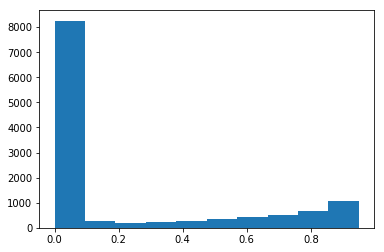

In [20]:
plt.hist(temp[temp.RatioSum < 0.95]["RatioSum"])
plt.show()

In [22]:
len(temp[temp.RatioSum == 0]) / len(temp[temp.RatioSum != 1])

0.4541954887218045

In ~ 20% of the cases, the ratios do not sum up to 1 (they are smaller)! 

~ 45 % the ratios that don't sum up to 1 are zero.

In [161]:
# Nearly all lost opportunities have passed and equal number of days qualified as days closing
# => The opportunities remain in the "qualified" stage
temp1 = len(data[data.OpportunityResult == "Loss"])
temp2 = len(data[(data.OpportunityResult == "Loss") & (data.DaysClosing == data.DaysQualified)])

print("Percentage of lost cases that left the Qualified stage:", round(((temp1 - temp2)/temp1) * 100, 2), "%")

temp3 = len(data[data.OpportunityResult == "Won"])
temp4 = len(data[(data.OpportunityResult == "Won") & (data.DaysClosing == data.DaysQualified)])

print("Percentage of won cases that left the Qualified stage:", round(((temp3 - temp4)/temp3) * 100, 2), "%")



Percentage of lost cases that left the Qualified stage: 2.43 %
Percentage of won cases that left the Qualified stage: 20.77 %


In [30]:
# Number of opportunities with opportunity amount = 0
data[data.OpportunityAmount == 0].shape

(2047, 19)

In [31]:
# Is this systematically influenced?
data["OppAmZero"] = data.OpportunityAmount == 0
data.groupby("OppAmZero").mean()
# No!

,DaysSales,SalesStageChangeCount,DaysClosing,DaysQualified,OpportunityAmount,ClientRevenue,ClientEmployees,PastRevenue,IdentifiedDaysRatio,ValidatedDaysRatio,QualifiedDaysRatio,DealSizeCategory
OppAmZero,,,,,,,,,,,,
False,43.499658,2.961226,16.783174,16.370199,94106.152702,1.617231,1.601042,0.302969,0.201755,0.491213,0.186315,3.502395
True,47.147044,2.751832,14.693698,14.241329,0.000000,1.741085,1.715681,0.315095,0.251614,0.380694,0.138010,1.000000


Results from data discovery:
- The number of days to closing is always larger or equal than the number of days qualified. <br>
=> The stage "qualified" comes first in the sales process <br><br>

- The sales stages might be in this order: <br>
    1) Identify an opportunity: Gain knowledge about a sales opportunity <br>
    2) Validate an opportunity: Evaluate whether an catual opportunity exists by evaluating the customers needs and details about the opportunity <br>
    3) Qualify an opportunity: "determine whether your prospect has a specific need or challenge you can satisfy and whether it’s feasible for them to implement your particular product or service." <br>
    4) Closing
<br><br>

- All the variables regarding the days elapsed should not be using in predictions because they are not available at the time of prediction!
- The only way they could be integrated would be to predict, based on historical data, apart from how many days elapsed in stage X, the opportunity is unlikely to be won. This would require a second prediction at a later time than our baseline prediction which is made at the beginning.

References regarding the sales process (maybe look for academic references):
- Validation: https://www.sales-transformation-asia.com/single-post/2018/01/12/Sales-Prospecting-Training-How-to-Validate-Your-Sales-Opportunity-with-Prospects
- Qualification: https://blog.hubspot.com/sales/ultimate-guide-to-sales-qualification